In [13]:
import networkx as nx
import pandas as pd
import numpy as np
import math
import random
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt
import datetime
start_time = datetime.time(9, 0)
end_time = datetime.time(17, 0)

In [14]:
class Scheduler: 

  def __init__(self, base_sites, job_sites, job_durations): 

    self.base_sites = base_sites
    self.job_sites = job_sites
    self.job_durations = job_durations
    self.site_distances = []
    self.travel_speed = 1


  def handle_schedule(self):
    if self.job_sites.shape[1] != self.base_sites.shape[1]:
      print("Lets go!")
      
    X = np.square(self.base_sites[:,0] - self.job_sites[:,0])
    Y = np.square(self.base_sites[:,1] - self.job_sites[:,1])
    self.site_distances = np.sqrt(X+Y)

    self.travel_duration = self.site_distances / self.travel_speed
    
    ## Building cost matrix
    XX , YY = np.meshgrid(self.job_durations, self.travel_duration)
    self.cost_matrix = XX + YY
    
    # for linear assignment
    self.assignment_row_index, self.assignment_col_index = linear_sum_assignment(self.cost_matrix)
    

  def handle_visualize_grpah(self) : 
    
    graph =  nx.DiGraph()

    job_graph_nodes =  [ "J-{}".format(count)  for count, i in enumerate(self.job_durations[0])]
    site_graph_nodes = [ "E-{}".format(count) for count, i in enumerate(self.travel_duration)]
    
    all_nodes = job_graph_nodes + site_graph_nodes
    graph.add_nodes_from( all_nodes, color="#FFE699" ) 

    # create edges (fully connected graph) 
    # for i, nodeA in enumerate(job_graph_nodes): 
    #   for j, nodeB in enumerate(site_graph_nodes): 
    #     graph.add_edge( nodeA, nodeB, weight = self.cost_matrix[j, i] ) 

    job_node_pos = nx.bipartite_layout(graph, job_graph_nodes)
    site_node_pos = nx.bipartite_layout(graph, site_graph_nodes)

    if len(self.assignment_row_index) == len(self.assignment_col_index): 
      for edge in zip(self.assignment_row_index, self.assignment_col_index): 
        nodeA = "E-{}".format(edge[0]) 
        nodeB = "J-{}".format(edge[1])

        graph.add_edge( nodeA, nodeB, weight = "{:.2}".format( self.cost_matrix[edge[0], edge[1] ] )  )

    edge_cost_labels = nx.get_edge_attributes(graph, "weight")
    
    nx.draw_networkx_edge_labels(graph, site_node_pos, edge_labels=edge_cost_labels, label_pos = 0.2) 
    nx.draw(graph, pos = site_node_pos, with_labels  = True, node_size = 750, node_color = "red") 
    

  def handle_print_schedule(self): 
    
    day1 = {}
    status_of_day1 = []
    coulums = ["Engineer", "Job", "job_duration (hours)", "travel_time", "total_time", "Start time", "end time", "over time for day2"]
    for i in coulums:
      # day1[i] = None
      day1["Engineer"] = ["Engineer {}".format(i) for count, i in enumerate(self.assignment_row_index)]
      day1["Job"] = ["Job {}".format(i) for count, i in enumerate(self.assignment_col_index)]
      day1["job_duration (hours)"] = self.job_durations[0].round(2)
      day1["travel_time"] = self.site_distances[self.assignment_col_index].round(2)
      day1["total_time"] = self.job_durations[0].round(2) + self.site_distances[self.assignment_col_index].round(2)
      day1["Start time"] = "{:.1f} AM".format(start_time.hour)
      day1["end time"] = "{:.1f} PM".format(end_time.hour)

    df = pd.DataFrame.from_dict(day1)
    df["job_duration (hours)"] = round(df["job_duration (hours)"]*10)
    df["travel_time"] = round(df["travel_time"]*10)
    df["total_time"] = round(df["total_time"]*10)
    df["over time for day1 (hours)"] = df.apply(lambda row: 8 - row.total_time, axis = 1)

    return df

  def handle_mesh_grid(self):

    ex,ey,jx,jy = [],[],[],[]
    for i in self.assignment_row_index:
      ex.append(self.base_sites[i][0])
      ey.append(self.base_sites[i][1])
    for i in self.assignment_col_index:
      jx.append(self.job_sites[i][0])
      jy.append(self.job_sites[i][1])

    fig, ax = plt.subplots()
    ax.scatter(ex, ey, alpha=0.8, label="engineer's base")
    ax.scatter(jx, jy, alpha=0.8, label="job site") 

    for i in range(len(ex)):
      ax.annotate("", xy=(jx[i], jy[i]), xytext=(ex[i], ey[i]), arrowprops=dict(arrowstyle="->"))

    ax.legend()
    ax.grid(True)
    plt.show()

In [15]:
M = 20
N = 16
base = np.random.rand(M, 2)
site = np.random.rand(M, 2)
jobs = np.random.rand(N, 1).reshape(1, -1)
scheduler = Scheduler(base, site, jobs)
scheduler.handle_schedule()

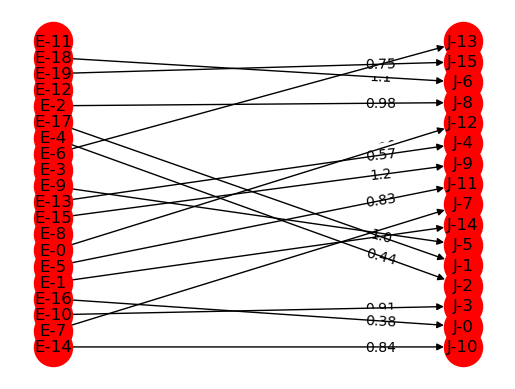

In [16]:
scheduler.handle_visualize_grpah()

In [17]:
scheduler.handle_print_schedule()

,Engineer,Job,job_duration (hours),travel_time,total_time,Start time,end time,over time for day1 (hours)
0,Engineer 0,Job 12,3.0,9.0,12.0,9.0 AM,17.0 PM,-4.0
1,Engineer 1,Job 14,4.0,2.0,7.0,9.0 AM,17.0 PM,1.0
2,Engineer 2,Job 8,2.0,8.0,10.0,9.0 AM,17.0 PM,-2.0
3,Engineer 4,Job 2,7.0,8.0,14.0,9.0 AM,17.0 PM,-6.0
4,Engineer 5,Job 11,5.0,11.0,15.0,9.0 AM,17.0 PM,-7.0
5,Engineer 6,Job 13,10.0,1.0,11.0,9.0 AM,17.0 PM,-3.0
6,Engineer 7,Job 7,4.0,7.0,11.0,9.0 AM,17.0 PM,-3.0
7,Engineer 9,Job 5,4.0,6.0,9.0,9.0 AM,17.0 PM,-1.0
8,Engineer 10,Job 3,2.0,9.0,11.0,9.0 AM,17.0 PM,-3.0
9,Engineer 13,Job 4,8.0,3.0,10.0,9.0 AM,17.0 PM,-2.0


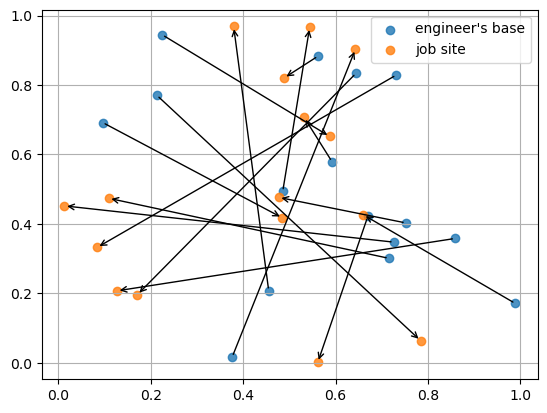

In [18]:
scheduler.handle_mesh_grid()